In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [163]:
df = pd.read_csv('data/weather_classification_data.csv')
print(df.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


**Exploratory Data Analysis(EDA)**

In [164]:
# number of rows and columns
rows, cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  13200
Number of columns:  11


In [165]:
# types of columns
pd.set_option('display.max_columns', None)
print(df.dtypes)

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object


In [166]:
# The target data is catagorical and it is nicely balanced
print(df['Weather Type'].value_counts())

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Weather Type ')

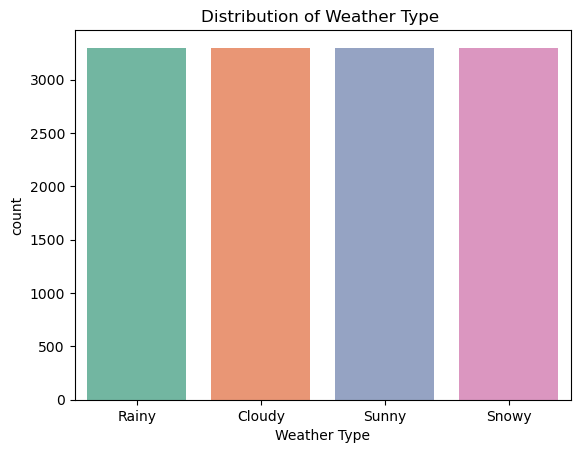

In [167]:
#target column
sns.countplot(x=df['Weather Type'], palette="Set2") 
plt.title('Distribution of Weather Type ')

In [168]:
# describe continuous data
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [169]:
# describe catagorical data
df.describe(include='object')

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [170]:
#numerical_columns & categorical_columns 
cat = df.select_dtypes(include=object).columns.tolist()
num = df.select_dtypes(exclude=object).columns.tolist()
print(' categorical_columns: \n' ,cat)
print('\n numerical_columns: \n' , num)

 categorical_columns: 
 ['Cloud Cover', 'Season', 'Location', 'Weather Type']

 numerical_columns: 
 ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


In [171]:
# check for missing values
# no missing values
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [172]:
# check repeated rows
df.duplicated().sum()

0

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64


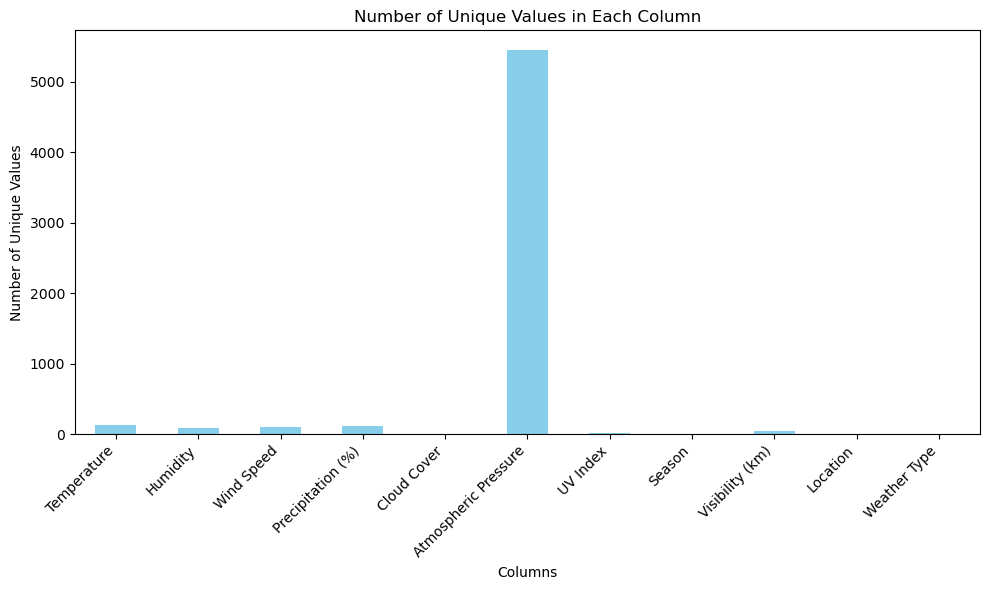

In [173]:
# check the number of unique values in each column and remove unnecessary columns
print(df.nunique())
unique_counts = df.nunique()
# Plotting the unique value counts
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [174]:
# # drop the atomospheric pressure column, 
# # too many unique values, not useful
# df.drop(['Atmospheric Pressure'], axis=1, inplace=True)

In [175]:
cat_cols = ['Cloud Cover', 'Season', 'Location']

for col in cat_cols:
    counts = df[col].value_counts()
    print(counts)
    print("\n")


Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64


Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64


Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64




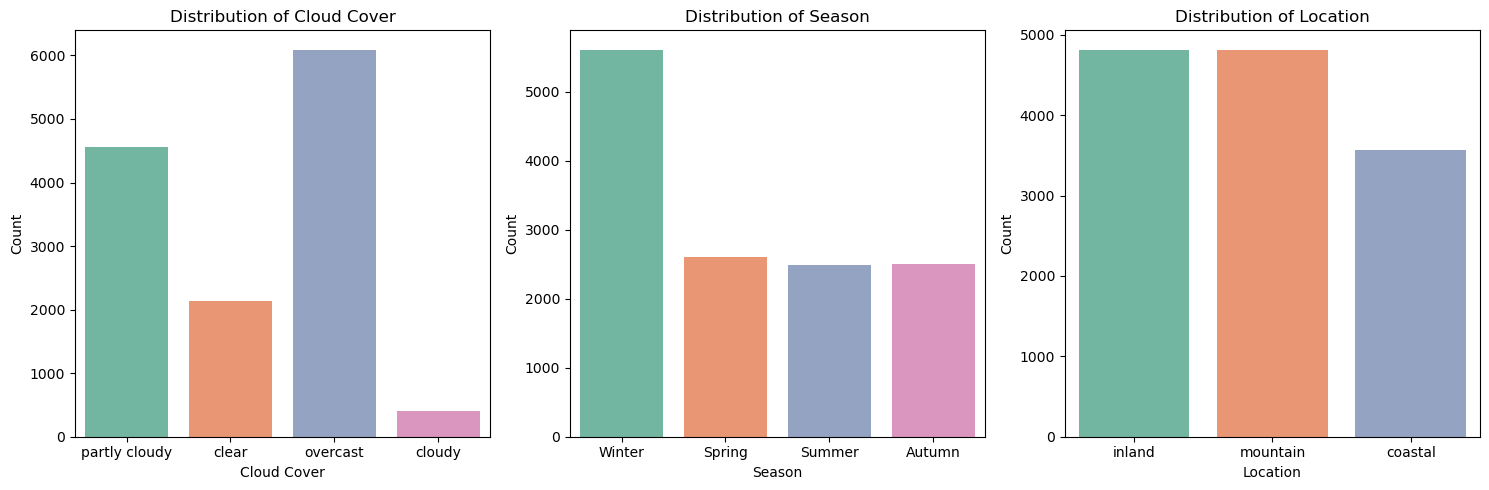

In [176]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i) 
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    sns.countplot(x=df[col], palette="Set2") 
plt.tight_layout()
plt.show()



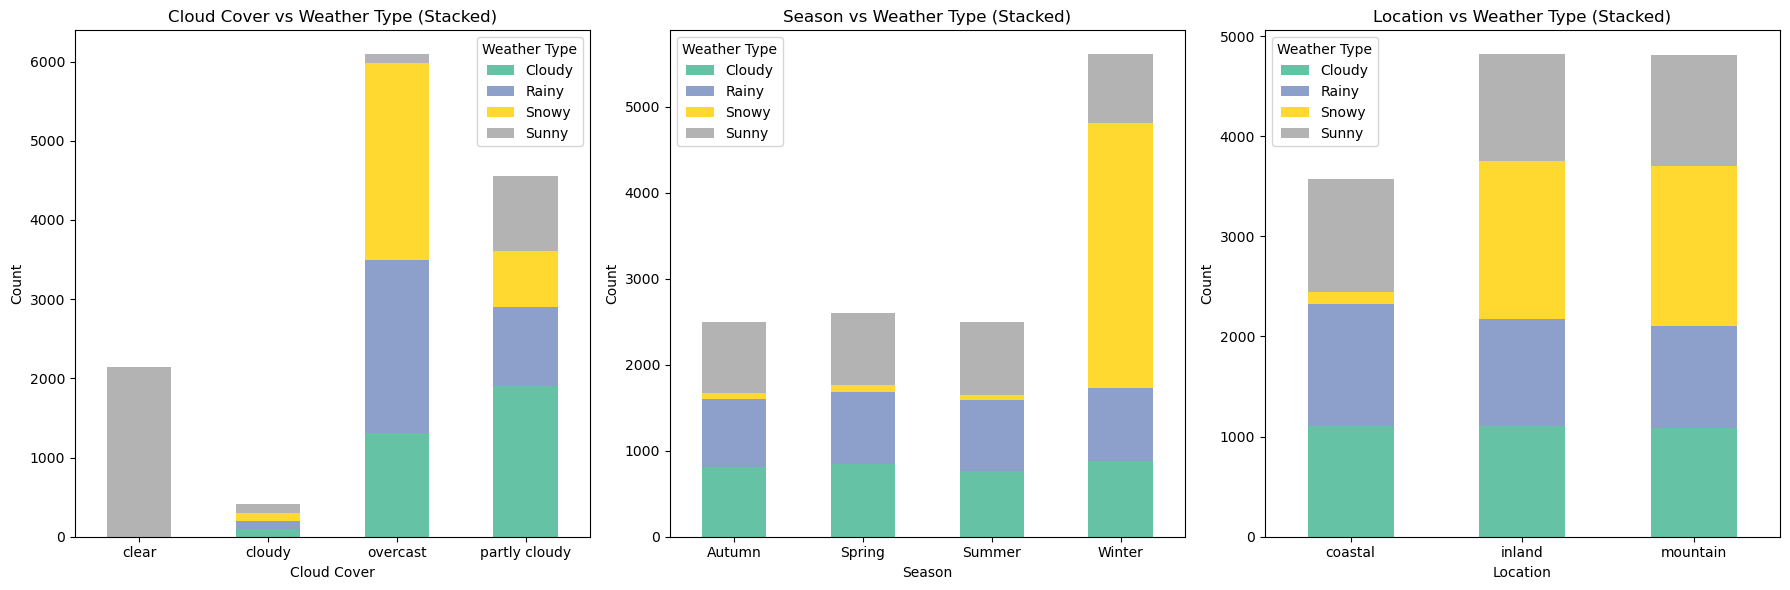

In [177]:
# these three categorical data with the target data
cat_cols = ['Cloud Cover', 'Season', 'Location']
target_col = 'Weather Type'

plt.figure(figsize=(18, 6)) 

for i, col in enumerate(cat_cols, 1):
    # Create a crosstab for the categorical variable and the target
    crosstab = pd.crosstab(df[col], df[target_col])
    # Create a stacked bar plot
    ax = plt.subplot(1, 3, i)
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    plt.title(f"{col} vs {target_col} (Stacked)")
    plt.xlabel(col)
    plt.ylabel('Count')
    # Rotate X-axis labels to be horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


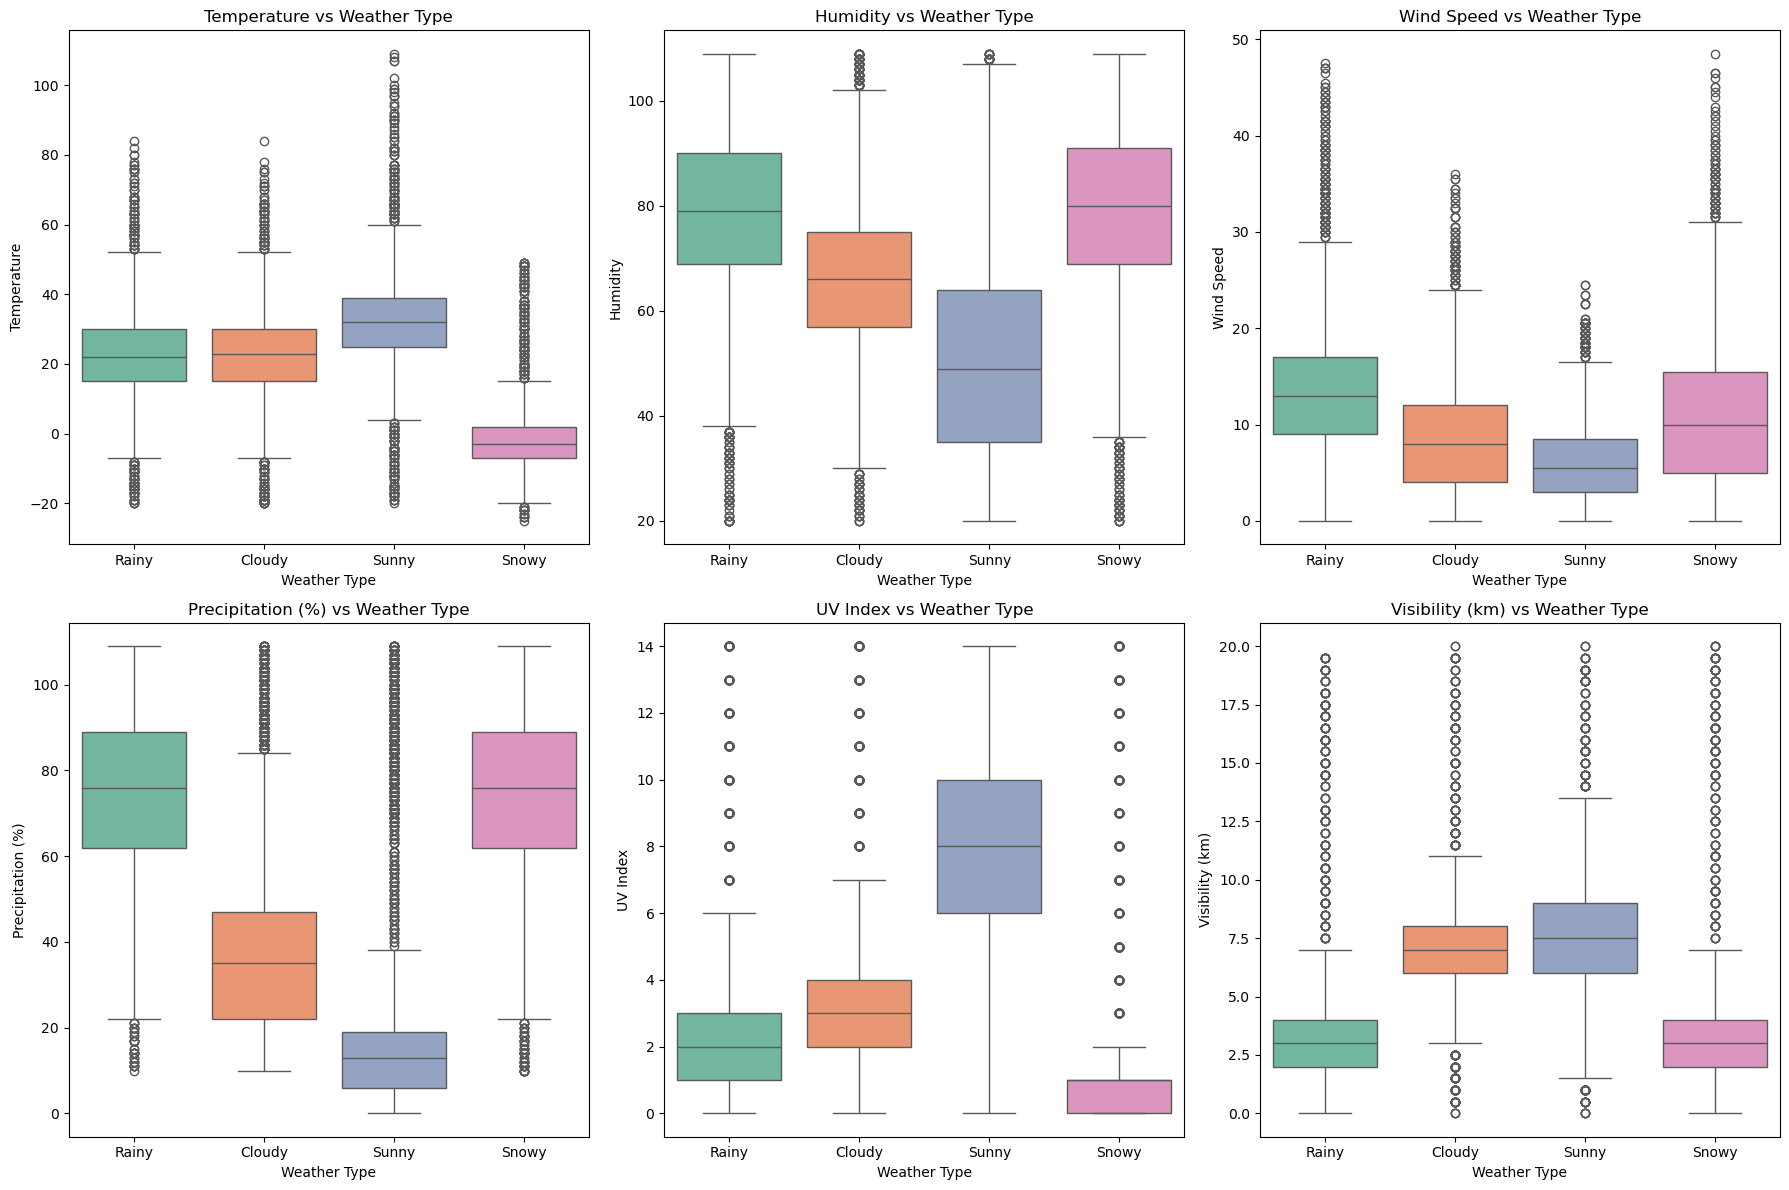

In [178]:
# create 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',  'UV Index', 
# 'Visibility (km)'s relation with weather tpye
#  each data is kind of important to predict the weather type
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'UV Index', 'Visibility (km)']
target_col = 'Weather Type'

plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target_col, y=col, data=df, palette='Set2') # Create a box plot for each numerical column
    plt.title(f"{col} vs {target_col}")
    plt.xlabel('Weather Type')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


**Splitting**

In [179]:
# split the data using stratified split. 
# No stratified group split since every data is independent
from sklearn.model_selection import StratifiedShuffleSplit
def stratified_shuffle_split(X, y, train_size, val_size, test_size, random_state=None):
    # Test if the sum of train_size, val_size, and test_size is equal to 1
    #if train_size + val_size + test_size != 1:
    #for more accurate:
    if not np.isclose(train_size + val_size + test_size, 1):
        raise ValueError("The sum of train_size, val_size, and test_size must be equal to 1.")
    
    # Test if random_state is an integer
    if random_state is not None and not isinstance(random_state, int):
        raise ValueError("random_state must be an integer.")
    
    # Create the GroupShuffleSplit object for the training and other sets
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=val_size+test_size, random_state=random_state)
    # Split the dataset into training and other sets
    train_index, temp_index = next(sss.split(X, y))
    X_train, X_temp = X.iloc[train_index], X.iloc[temp_index]
    y_train, y_temp = y.iloc[train_index], y.iloc[temp_index]

    # Split the remaining dataset into validation and test sets
    test_ratial = test_size / (val_size + test_size)
    sss_val_test = StratifiedShuffleSplit(n_splits=1, test_size=test_ratial, random_state=random_state)
    val_index, test_index = next(sss_val_test.split(X_temp, y_temp))
    X_val, X_test = X_temp.iloc[val_index], X_temp.iloc[test_index]
    y_val, y_test = y_temp.iloc[val_index], y_temp.iloc[test_index]

    # Check output sizes based on actual sample counts
    expected_train_size = int(np.floor(train_size * len(X)))
    expected_val_size = int(np.floor(val_size * len(X)))
    expected_test_size = len(X) - expected_train_size - expected_val_size

        # Print actual sizes
    print(f"Training set actual size: {X_train.shape[0]}")
    print(f"Validation set actual size: {X_val.shape[0]}")
    print(f"Test set actual size: {X_test.shape[0]}")

    # Size check for expected output sizes
    if X_train.shape[0] != expected_train_size:
        raise ValueError(f"Expected training set size {expected_train_size}, but got {X_train.shape[0]}.")
    if X_val.shape[0] != expected_val_size:
        raise ValueError(f"Expected validation set size {expected_val_size}, but got {X_val.shape[0]}.")
    if X_test.shape[0] != expected_test_size:
        raise ValueError(f"Expected test set size {expected_test_size}, but got {X_test.shape[0]}.")

    return X_train, y_train, X_val, y_val, X_test, y_test

In [180]:
X = df.drop(columns='Weather Type')
y = df['Weather Type']
# Let the tarining set be 0.6, validation set be 0.2, and test set be 0.2
X_train, y_train, X_val, y_val, X_test, y_test = stratified_shuffle_split(X, y, \
                                                    train_size=0.6, val_size=0.2, \
                                                    test_size=0.2, random_state=42)

print("X_train head:\n", X_train.head())
print("X_val head:\n", X_val.head())
print("X_test head:\n", X_test.head())


Training set actual size: 7920
Validation set actual size: 2640
Test set actual size: 2640
X_train head:
       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
80           27.0        73         9.5               47.0  partly cloudy   
3456         21.0        64         8.5               80.0       overcast   
1416         26.0        39         9.5                6.0          clear   
2256         -8.0        90         7.0               78.0       overcast   
7335         14.0        75        12.5               33.0  partly cloudy   

      Atmospheric Pressure  UV Index  Season  Visibility (km) Location  
80                 1017.82         1  Summer              7.0  coastal  
3456               1008.45         0  Spring              2.0   inland  
1416               1028.53         7  Spring              9.0  coastal  
2256                987.97         1  Winter              4.0   inland  
7335                834.55         4  Winter             10.5   in

**Preprocessing**

In [181]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer # include transformers in a pipeline

continuous_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()  # Exclude 'object' type columns
categorical_cols = ['Location']  # Include only 'Location' 
ordinal_cols = ['Season', 'Cloud Cover']  # Include 'Season' and 'Cloud Cover' columns
ordinal_categories = [
    ['Spring', 'Summer', 'Autumn', 'Winter'],  # Season order
    ['clear', 'partly cloudy', 'cloudy', 'overcast']  # Cloud Cover order
]

# Define a preprocessing pipeline for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),  # Standardize continous columns
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),  # Ordinal encode the 'Season' column
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols),  # One-hot encode categorical columns
    ])
# Transform the training set
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Transform the validation and test sets using the same transformations learned from the training set
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)
# Convert the transformed data back to a DataFrame to inspect it
# Getting feature names from OneHotEncoder for categorical columns
cat_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine continuous column names and one-hot encoded categorical column names
all_columns = continuous_cols + ordinal_cols + cat_encoded_cols.tolist()

# Convert the transformed arrays back to DataFrames for viewing
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=all_columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)

# Show the head of each preprocessed dataset
print("X_train_preprocessed head:\n", X_train_preprocessed_df.head())
print("X_val_preprocessed head:\n", X_val_preprocessed_df.head())
print("X_test_preprocessed head:\n", X_test_preprocessed_df.head())
print("X_train_preprocessed shape:", X_train_preprocessed_df.shape)


X_train_preprocessed head:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0     0.455193  0.224974   -0.056432          -0.198422              0.318802   
1     0.111017 -0.220549   -0.201777           0.835047              0.071231   
2     0.397830 -1.458110   -0.056432          -1.482429              0.601778   
3    -1.552499  1.066516   -0.419796           0.772413             -0.469884   
4    -0.290521  0.323979    0.379606          -0.636863             -4.523493   

   UV Index  Visibility (km)  Season  Cloud Cover  Location_coastal  \
0 -0.773173         0.454310     1.0          1.0               1.0   
1 -1.033893        -1.023182     0.0          3.0               0.0   
2  0.791147         1.045307     0.0          0.0               1.0   
3 -0.773173        -0.432185     3.0          3.0               0.0   
4  0.008987         1.488554     3.0          1.0               0.0   

   Location_inland  Location_mountain  
0              0.0

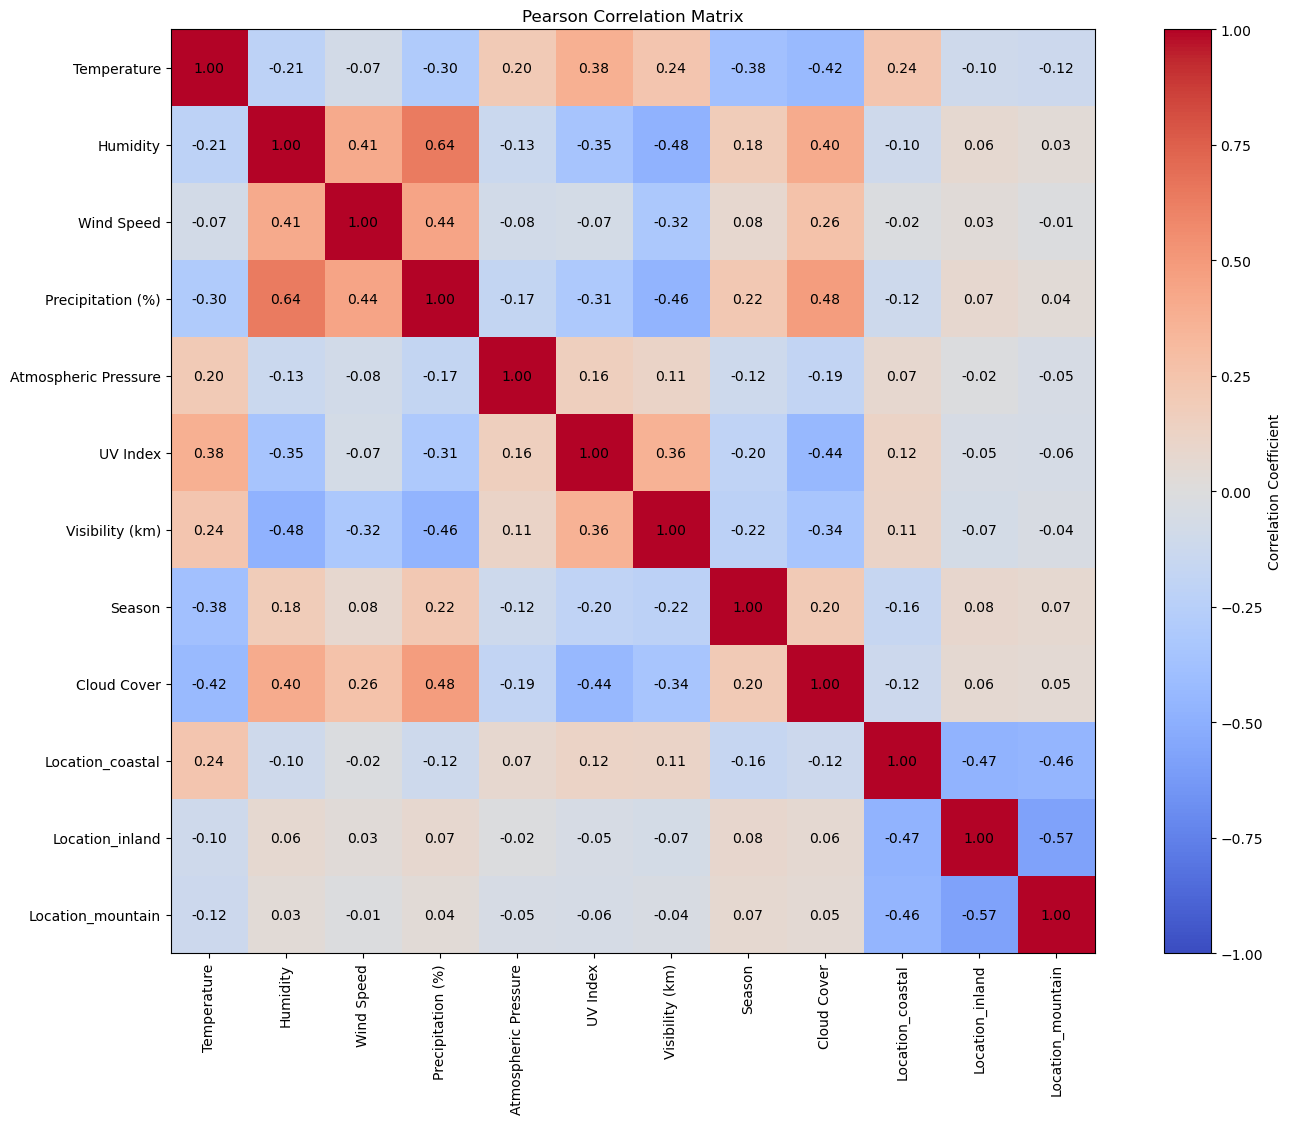

In [182]:
# calculate the correlation matrix
correlation_matrix = X_train_preprocessed_df.corr()
# plot the correlation matrix
plt.figure(figsize=(18,12))
# set color scale
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Pearson Correlation Matrix')
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)#rotation=90
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
# Annotate the heatmap with correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

From Correlation Matrix, there's no need to remove any

In [183]:
# Revert label encoding for the target variable
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target (y_train) and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the validation and test targets using the same encoder
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Display the encoded target values
print("Encoded y_train:", y_train_encoded)
print("Encoded y_val:", y_val_encoded)
print("Encoded y_test:", y_test_encoded)

# To decode back to the original labels if needed:
# original_labels = label_encoder.inverse_transform(y_train_encoded)

Encoded y_train: [0 1 3 ... 0 0 3]
Encoded y_val: [0 2 3 ... 3 1 3]
Encoded y_test: [3 1 0 ... 0 1 1]


In [184]:
# Look up the mapping of labels to numbers
print("Mapping of labels to numbers:", dict(enumerate(label_encoder.classes_)))

Mapping of labels to numbers: {0: 'Cloudy', 1: 'Rainy', 2: 'Snowy', 3: 'Sunny'}


In [185]:
# # Decode the encoded target values if needed
# y_decoded = label_encoder.inverse_transform(y_encoded)
# print("Decoded target variable:", y_decoded)

**Preprocessing functions**

In [186]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Function for stratified shuffle split (other and test only)
def stratified_shuffle_split(X, y, train_size, test_size, random_state=None):
    # Test if train_size + test_size is equal to 1
    if not np.isclose(train_size + test_size, 1):
        raise ValueError("The sum of train_size and test_size must be equal to 1.")
    
    # Test if random_state is an integer
    if random_state is not None and not isinstance(random_state, int):
        raise ValueError("random_state must be an integer.")
    
    # Create the StratifiedShuffleSplit object
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=test_size, random_state=random_state)
    
    # Split the dataset into training and test sets
    train_index, test_index = next(sss.split(X, y))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # # Print sizes
    # print(f"Training set size: {X_train.shape[0]}")
    # print(f"Test set size: {X_test.shape[0]}")
    
    return X_train, y_train, X_test, y_test

# Example usage of stratified shuffle split
X_train, y_train, X_test, y_test = stratified_shuffle_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Preprocessing function
def preprocess_data(X_train, X_test, y_train, y_test):
    # Define column categories
    continuous_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
    categorical_cols = ['Location']
    ordinal_cols = ['Season', 'Cloud Cover']
    ordinal_categories = [
    ['Spring', 'Summer', 'Autumn', 'Winter'],  # Season order
    ['clear', 'partly cloudy', 'cloudy', 'overcast']  # Cloud Cover order
    ]
    # Define a preprocessing pipeline for numerical and categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), continuous_cols),  # Standardize continuous columns
            ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),  # Ordinal encode ordinal columns
            ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
        ]
    )
    
    # Apply transformations to the train and test sets
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Get feature names
    cat_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_columns = continuous_cols + ordinal_cols + cat_encoded_cols.tolist()
    
    # Convert transformed arrays back to DataFrames
    X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
    X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)
    
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Fit the encoder on the training target (y_train) and transform it
    y_train_encoded = label_encoder.fit_transform(y_train)

    # Transform test targets using the same encoder
    y_test_encoded = label_encoder.transform(y_test)
    
    return X_train_preprocessed_df, X_test_preprocessed_df, y_train_encoded, y_test_encoded

# Apply preprocessing
X_train_preprocessed_df, X_test_preprocessed_df, y_train_encoded, y_test_encoded = preprocess_data(X_train, X_test, y_train, y_test)

# Show the head of preprocessed data
print("X_train_preprocessed head:\n", X_train_preprocessed_df.head())
print("X_test_preprocessed head:\n", X_test_preprocessed_df.head())
print("X_train_preprocessed shape:", X_train_preprocessed_df.shape)
print("X_test_preprocessed shape:", X_test_preprocessed_df.shape)

X_train_preprocessed head:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -1.504844  0.071429   -1.215273           0.574859             -0.438371   
1    -1.216346 -0.424296    0.524401           0.668613             -0.210290   
2    -1.043247  1.310742   -0.852841           1.356146             -0.483666   
3     0.053044 -0.473868    0.016996          -1.175225              0.253644   
4     0.572340 -1.812326   -0.997814          -1.206476              0.173239   

   UV Index  Visibility (km)  Season  Cloud Cover  Location_coastal  \
0 -0.778137        -1.024227     3.0          3.0               0.0   
1 -0.778137        -0.285723     3.0          3.0               0.0   
2 -1.037426        -0.728825     3.0          3.0               0.0   
3  1.555463         1.191286     1.0          1.0               0.0   
4  1.814752         0.157380     0.0          0.0               1.0   

   Location_inland  Location_mountain  
0              0.0

**Cross Validation**

In [187]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.metrics import accuracy_score
# import pandas as pd
# import numpy as np

# def MLpipe_KFold_Classification(X, y, models_with_params, random_states=5):
#     """
#     Classification pipeline using KFold and cross-validation.
#     Preprocessing and data splitting are handled by external functions.
#     No need to split into validation set since KFold is used.

#     Args:
#         X: Features matrix.
#         y: Target variable.
#         stratified_split_func: Function to perform stratified shuffle split.
#         preprocess_func: Function to preprocess the data.
#         models_with_params: Dictionary of models and their parameter grids.
#         random_states: Number of random states for repeated splits.

#     Returns:
#         test_scores: List of dictionaries with test scores for each model.
#         best_models: List of best models from GridSearchCV for each random state.
#     """
#     test_scores = []
#     best_models = []

#     for random_state in range(random_states):
#         print(f"\nRandom State {random_state}")
        
#         # Split the data
#         X_other, y_other, X_test, y_test = stratified_shuffle_split(X, y, train_size=0.8, test_size=0.2, random_state=random_state)
        
#         # Preprocess the data
#         X_other_preprocessed, X_test_preprocessed, y_other_encoded, y_test_encoded = preprocess_data(X_other, X_test, y_other, y_test)

#         # Define StratifiedKFold for cross-validation
#         skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

#         # Iterate over models
#         for model_name, model_info in models_with_params.items():
#             print(f"\nTraining {model_name}...")
            
#             # Create GridSearchCV
#             grid = GridSearchCV(
#                 estimator=model_info["model"],
#                 param_grid=model_info["params"],
#                 scoring="accuracy",  # Adjust metric if needed
#                 cv=skf,
#                 n_jobs=-1,
#                 verbose=True
#             )
            
#             # Fit the model
#             grid.fit(X_other_preprocessed, y_other_encoded)

#             # Get the best model and test score
#             best_model = grid.best_estimator_
#             best_models.append((random_state, model_name, best_model))

#             y_test_pred = best_model.predict(X_test_preprocessed)
#             test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

#             test_scores.append({
#                 "Random State": random_state,
#                 "Model": model_name,
#                 "Best Params": grid.best_params_,
#                 "Test Accuracy": test_accuracy,
#                 "Cross-Validation Accuracy": grid.best_score_
#             })

#             print(f"Best Parameters: {grid.best_params_}")
#             print(f"Test Accuracy: {test_accuracy}")
#             print(f"Cross-Validation Accuracy: {grid.best_score_}")

#     return test_scores, best_models


In [188]:

# # Example models and parameter grids
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

# X = df.drop(columns='Weather Type')
# y = df['Weather Type']

# models_with_params = {
#     "Logistic Regression": {
#         "model": LogisticRegression(max_iter=2000),
#         "params": {
#             "C": [0.01, 0.1, 1, 10, 100],
#             "penalty": ["l2"],
#             "solver": ["lbfgs", "sag", "newton-cg"]
#         }
#     },
#     "Random Forest": {
#         "model": RandomForestClassifier(random_state=42),
#         "params": {
#             "n_estimators": [50, 100, 200],
#             "max_depth": [5, 10, None],
#             "min_samples_split": [2, 5, 10]
#         }
#     },
#     "SVM": {
#         "model": SVC(),
#         "params": {
#             "C": [0.1, 1, 10],
#             "gamma": [0.01, 0.1, 1],
#             "kernel": ["rbf"]
#         }
#     },
#     "XGBoost": {
#         "model": XGBClassifier(eval_metric="logloss"),
#         "params": {
#             "eta": [0.01, 0.1, 0.3],
#             "max_depth": [3, 6, 9],
#             "n_estimators": [50, 100, 200]
#         }
#     }
# }

# # Call the function directly with X and y
# test_scores, best_models = MLpipe_KFold_Classification(
#     X, y, models_with_params, random_states=5
# )
# # # display the test scores
# # test_scores_df = pd.DataFrame(test_scores)
# # print(test_scores_df)

In [189]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def MLpipe_KFold_Classification(X, y, models_with_params, random_states=5):
    """
    Classification pipeline using KFold and cross-validation.
    Preprocessing and data splitting are handled by external functions.
    No need to split into validation set since KFold is used.

    Args:
        X: Features matrix.
        y: Target variable.
        stratified_split_func: Function to perform stratified shuffle split.
        preprocess_func: Function to preprocess the data.
        models_with_params: Dictionary of models and their parameter grids.
        random_states: Number of random states for repeated splits.

    Returns:
        test_scores: List of dictionaries with test scores for each model.
        best_models: List of best models from GridSearchCV for each random state.
    """
    test_scores = []
    best_models = []

    for model_name, model_info in models_with_params.items():
        print(f"Model Name: {model_name}...")
        for random_state in range(random_states):
            print(f"\nRandom State {random_state}")
        
            # Split the data
            X_other, y_other, X_test, y_test = stratified_shuffle_split(X, y, train_size=0.8, test_size=0.2, random_state=random_state)
        
            # Preprocess the data
            X_other_preprocessed, X_test_preprocessed, y_other_encoded, y_test_encoded = preprocess_data(X_other, X_test, y_other, y_test)

            # Define StratifiedKFold for cross-validation
            skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
            
            # Create GridSearchCV
            grid = GridSearchCV(
                estimator=model_info["model"],
                param_grid=model_info["params"],
                scoring="accuracy",  # Adjust metric if needed
                cv=skf,
                n_jobs=-1,
                verbose=True
            )
            
            # Fit the model
            grid.fit(X_other_preprocessed, y_other_encoded)

            # Get the best model and test score
            best_model = grid.best_estimator_
            best_models.append((best_model))

            y_test_pred = best_model.predict(X_test_preprocessed)
            test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
            test_scores.append(test_accuracy)

            print(f"Best Parameters: {grid.best_params_}")
            print(f"Test Accuracy: {test_accuracy}")
            print(f"Cross-Validation Accuracy (GridSearchCV best score): {grid.best_score_}")
            # print the mean and standard deviation of the test scores
        print(f"\nFinal Results: {model_name}")
        print(f"Mean Test Score: {np.mean(test_scores)}")
        print(f"Standard Deviation of Test RMSE: {np.std(test_scores)}")

    return test_scores, best_models


In [190]:
# Example models and parameter grids
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

X = df.drop(columns='Weather Type')
y = df['Weather Type']

models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l2"],
            "solver": ["lbfgs", "sag", "newton-cg"]
        }
    }
}
# Call the function directly with X and y
test_scores_lr, best_models_lr = MLpipe_KFold_Classification(
    X, y, models_with_params, random_states=10
)

Model Name: Logistic Regression...

Random State 0
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8549242424242425
Cross-Validation Accuracy (GridSearchCV best score): 0.8722537878787879

Random State 1
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Test Accuracy: 0.8666666666666667
Cross-Validation Accuracy (GridSearchCV best score): 0.8690340909090909

Random State 2
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Test Accuracy: 0.8734848484848485
Cross-Validation Accuracy (GridSearchCV best score): 0.8680871212121213

Random State 3
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8704545454545455
Cross-Validation Accuracy (GridSearchCV best score

In [191]:
models_with_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    }
}

# Call the function directly with X and y
test_scores_rf, best_models_rf = MLpipe_KFold_Classification(
    X, y, models_with_params, random_states=10
)

Model Name: Random Forest...

Random State 0
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.9049242424242424
Cross-Validation Accuracy (GridSearchCV best score): 0.9200757575757575

Random State 1
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9140151515151516
Cross-Validation Accuracy (GridSearchCV best score): 0.9177083333333333

Random State 2
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.9132575757575757
Cross-Validation Accuracy (GridSearchCV best score): 0.915625

Random State 3
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.9204545454

In [192]:
models_with_params = {
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "gamma": [0.01, 0.1, 1],
            "kernel": ["rbf"]
        }
    }
}

# Call the function directly with X and y
test_scores_svm, best_models_svm = MLpipe_KFold_Classification(
    X, y, models_with_params, random_states=10
)

Model Name: SVM...

Random State 0
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.8996212121212122
Cross-Validation Accuracy (GridSearchCV best score): 0.912784090909091

Random State 1
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9034090909090909
Cross-Validation Accuracy (GridSearchCV best score): 0.9078598484848486

Random State 2
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9094696969696969
Cross-Validation Accuracy (GridSearchCV best score): 0.9088068181818182

Random State 3
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9143939393939394
Cross-Validation Accuracy (GridSearchCV best score): 0.9079545454545455

Random State 4
Fitting

In [193]:
models_with_params = {
    "XGBoost": {
        "model": XGBClassifier(eval_metric="logloss"),
        "params": {
            "eta": [0.01, 0.1, 0.3],
            "max_depth": [3, 6, 9],
            "n_estimators": [50, 100, 200]
        }
    }
}

# Call the function directly with X and y
test_scores_xgb, best_models_xgb = MLpipe_KFold_Classification(
    X, y, models_with_params, random_states=10
)

Model Name: XGBoost...

Random State 0
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'eta': 0.1, 'max_depth': 6, 'n_estimators': 100}
Test Accuracy: 0.9053030303030303
Cross-Validation Accuracy (GridSearchCV best score): 0.9184659090909091

Random State 1
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'eta': 0.3, 'max_depth': 9, 'n_estimators': 100}
Test Accuracy: 0.9106060606060606
Cross-Validation Accuracy (GridSearchCV best score): 0.9190340909090908

Random State 2
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'eta': 0.1, 'max_depth': 6, 'n_estimators': 200}
Test Accuracy: 0.9132575757575757
Cross-Validation Accuracy (GridSearchCV best score): 0.9144886363636364

Random State 3
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Parameters: {'eta': 0.3, 'max_depth': 3, 'n_estimators': 100}
Test Accuracy: 0.9151515151515152
Cross-Validation Accuracy (GridSearchCV best 

In [197]:
from sklearn.neighbors import KNeighborsClassifier
models_with_params = {
    "K-Nearest Neighbors (KNN)": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 10],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan", "minkowski"]  # Different distance metrics
        }
    }
}

# Call the function directly with X and y
test_scores_knn, best_models_knn = MLpipe_KFold_Classification(
    X, y, models_with_params, random_states=10
)

Model Name: K-Nearest Neighbors (KNN)...

Random State 0
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Test Accuracy: 0.884090909090909
Cross-Validation Accuracy (GridSearchCV best score): 0.9017992424242425

Random State 1
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Test Accuracy: 0.893560606060606
Cross-Validation Accuracy (GridSearchCV best score): 0.8960227272727274

Random State 2
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Test Accuracy: 0.8958333333333334
Cross-Validation Accuracy (GridSearchCV best score): 0.896496212121212

Random State 3
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Test Acc

In [199]:
print(f"Logistic Regression - Mean Test Accuracy: {np.\
    mean(test_scores_lr):.4f},Std:{np.std(test_scores_lr):.4f}")
print(f"Random Forest - Mean Test Accuracy: {np.\
    mean(test_scores_rf):.4f}, Std:{np.std(test_scores_rf):.4f}")
print(f"SVM - Mean Test Accuracy: {np.\
    mean(test_scores_svm):.4f}, Std: {np.std(test_scores_svm):.4f}")
print(f"XGBoost - Mean Test Accuracy: {np.\
    mean(test_scores_xgb):.4f}, Std: {np.std(test_scores_xgb):.4f}")
print(f"KNN - Mean Test Accuracy: {np.\
    mean(test_scores_knn):.4f}, Std: {np.std(test_scores_knn):.4f}")

Logistic Regression - Mean Test Accuracy: 0.8659,Std:0.0058
Random Forest - Mean Test Accuracy: 0.9128, Std:0.0040
SVM - Mean Test Accuracy: 0.9057, Std: 0.0046
XGBoost - Mean Test Accuracy: 0.9117, Std: 0.0040
KNN - Mean Test Accuracy: 0.8942, Std: 0.0049
